# House Prices: Advanced Regression Techniques (Kaggle)

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

Kaggle link <https://www.kaggle.com/c/house-prices-advanced-regression-techniques>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Dealing with missing value

In [2]:
data=pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.shape

(1460, 81)

In [4]:
missing_list = [1460 - data[data.columns[i]].count() for i in range(len(data.columns))]
col_name = data.columns
col_name = [x for x in col_name]

In [5]:
dic1 = {x:y for x, y in zip(col_name, missing_list)}
{k:v for k,v in dic1.items() if v>0}

{'Alley': 1369,
 'BsmtCond': 37,
 'BsmtExposure': 38,
 'BsmtFinType1': 37,
 'BsmtFinType2': 38,
 'BsmtQual': 37,
 'Electrical': 1,
 'Fence': 1179,
 'FireplaceQu': 690,
 'GarageCond': 81,
 'GarageFinish': 81,
 'GarageQual': 81,
 'GarageType': 81,
 'GarageYrBlt': 81,
 'LotFrontage': 259,
 'MasVnrArea': 8,
 'MasVnrType': 8,
 'MiscFeature': 1406,
 'PoolQC': 1453}

In [6]:
data["Fence"].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [7]:
col_name.remove("MiscFeature")
clean_data = data[col_name]

In [8]:
missing_list1 = [1460 - clean_data[clean_data.columns[i]].count()
                 for i in range(len(clean_data.columns))]

In [9]:
dict2 = {x:y for x, y in zip(col_name, missing_list1)}
{k:v for k,v in dict2.items() if v>0}#calculate the number of missing value in each columns

{'Alley': 1369,
 'BsmtCond': 37,
 'BsmtExposure': 38,
 'BsmtFinType1': 37,
 'BsmtFinType2': 38,
 'BsmtQual': 37,
 'Electrical': 1,
 'Fence': 1179,
 'FireplaceQu': 690,
 'GarageCond': 81,
 'GarageFinish': 81,
 'GarageQual': 81,
 'GarageType': 81,
 'GarageYrBlt': 81,
 'LotFrontage': 259,
 'MasVnrArea': 8,
 'MasVnrType': 8,
 'PoolQC': 1453}

From the dictionary above we can know that the number of missing values related to Basement feature are different. Here we need to identify whether the missing value represent "no basement" or missing values.

In [10]:
df1 = clean_data[["BsmtCond", "BsmtExposure",
                  "BsmtFinType1", "BsmtFinType2","BsmtQual"]].isnull()
df1[df1["BsmtCond"] == True].index == df1[df1["BsmtFinType1"] == True].index
#missing values in "BsmtCond" and "BsmtFinType1"

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

In [11]:
df1[df1["BsmtQual"] == True].index == df1[df1["BsmtCond"] == True].index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

From output above we can know that missing values in "BsmtCond", "BsmtQual" and "BsmtFinType1" are the same. Then we can make sure that missing values in these 3 columns are representing "no Basement".

In [12]:
df1[df1["BsmtFinType1"] == True].index

Int64Index([  17,   39,   90,  102,  156,  182,  259,  342,  362,  371,  392,
             520,  532,  533,  553,  646,  705,  736,  749,  778,  868,  894,
             897,  984, 1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179, 1216,
            1218, 1232, 1321, 1412],
           dtype='int64')

In [13]:
df1[df1["BsmtExposure"] == True].index

Int64Index([  17,   39,   90,  102,  156,  182,  259,  342,  362,  371,  392,
             520,  532,  533,  553,  646,  705,  736,  749,  778,  868,  894,
             897,  948,  984, 1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179,
            1216, 1218, 1232, 1321, 1412],
           dtype='int64')

In [14]:
l1 = df1[df1["BsmtExposure"] == True].index
l1 = [x for x in l1]
l1.remove(948)
df1[df1["BsmtFinType1"] == True].index == l1

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

Then from the output we can know that for "BsmtExposure", the "BsmtExposure" value in index 948 should be missing value rather than "no basement".

In [15]:
l2 = df1[df1["BsmtFinType2"] == True].index
l2 = [x for x in l2]
l2.remove(332)
df1[df1["BsmtFinType1"] == True].index == l2

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

Then from the output we can know that for "BsmtFinType2", the "BsmtFinType2" value in index 332 should be missing value rather than "no basement".

In [16]:
base_index = df1[df1["BsmtFinType1"] == True].index
base_index = [x for x in base_index]

In [17]:
clean_data.loc[base_index, ["BsmtCond", "BsmtExposure", "BsmtFinType1",
                            "BsmtFinType2","BsmtQual"]] = "NoBase"

In [18]:
clean_data["BsmtFinType2"].value_counts()

Unf       1256
Rec         54
LwQ         46
NoBase      37
BLQ         33
ALQ         19
GLQ         14
Name: BsmtFinType2, dtype: int64

In [19]:
clean_data.loc[332, "BsmtFinType2"] = "Unf"

In [20]:
clean_data["BsmtExposure"].value_counts()

No        953
Av        221
Gd        134
Mn        114
NoBase     37
Name: BsmtExposure, dtype: int64

In [21]:
clean_data.loc[948, "BsmtFinType2"] = "No"

Fill part of missing value in "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2" and "BsmtQual" by "NoBase" to represent that it is no basement in the house.

Similarly, we check missing values in garage data are real missing values or "no garage". Then we find that all missing values here represent "no garage".

In [22]:
df2 = clean_data[["GarageCond", "GarageFinish", "GarageQual",
                  "GarageType","GarageYrBlt"]].isnull()

In [23]:
df2[df2["GarageCond"] == True].index == df2[df2["GarageFinish"] == True].index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

In [24]:
df2[df2["GarageQual"] == True].index == df2[df2["GarageQual"] == True].index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

In [25]:
df2[df2["GarageQual"] == True].index == df2[df2["GarageYrBlt"] == True].index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

In [26]:
garage_index = df2[df2["GarageQual"] == True].index
garage_index = [x for x in garage_index]

In [27]:
clean_data.loc[garage_index, ["GarageCond", "GarageFinish", "GarageQual",
                              "GarageType"]] = "NoGarage"

In [28]:
clean_data["GarageYrBlt"].fillna(clean_data["GarageYrBlt"].mean(), inplace = True)#fill na with mean

In [29]:
df3 = clean_data[["MasVnrArea", "MasVnrType"]].isnull()
clean_data[["MasVnrArea", "MasVnrType"]]

,MasVnrArea,MasVnrType
0,196.0,BrkFace
1,0.0,None
2,162.0,BrkFace
3,0.0,None
4,350.0,BrkFace
5,0.0,None
6,186.0,Stone
7,240.0,Stone
8,0.0,None
9,0.0,None


In [30]:
l3 = df3[df3["MasVnrArea"] == True].index
clean_data["MasVnrArea"].fillna("0.0", inplace = True)
clean_data["MasVnrType"].fillna("None", inplace = True)
clean_data.loc[l3, ["MasVnrArea", "MasVnrType"]]

,MasVnrArea,MasVnrType
234,0.0,None
529,0.0,None
650,0.0,None
936,0.0,None
973,0.0,None
977,0.0,None
1243,0.0,None
1278,0.0,None


In [31]:
clean_data["Alley"].fillna("NoAlley", inplace = True)
clean_data["Electrical"].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [32]:
clean_data["Electrical"].fillna("SBrkr", inplace = True)
clean_data["Fence"].fillna("NoFence", inplace = True)

In [33]:
clean_data[clean_data["FireplaceQu"].isnull()==True].index ==clean_data[clean_data["Fireplaces"] == 0].index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

NaN in "FireplaceQu" here represents no fireplace, then we can replace the missing value in "FireplaceQu" by a new feature "NoFireplace".

In [34]:
clean_data["FireplaceQu"].fillna("NoFireplace", inplace = True)

In [35]:
index_compare = clean_data[clean_data["PoolQC"].isnull()==True].index == clean_data[clean_data["PoolArea"] == 0].index

In [36]:
len([x for x in index_compare])

1453

NaN in "PoolQC" here represents no pool, then we can replace the missing value in "PoolQC" by a new feature "NoPool".

In [37]:
clean_data["PoolQC"].fillna("NoPool", inplace = True)
clean_data["LotFrontage"].fillna(clean_data["LotFrontage"].mean(), inplace = True)

## Choosing variables

In this part, we will analyze several variables that seem to be relevant to sale price and  confirm which variables are proper to put in our model.

In [38]:
data = clean_data.copy()

### MSSubClass

(-0.5, 14.5, 0, 800000)

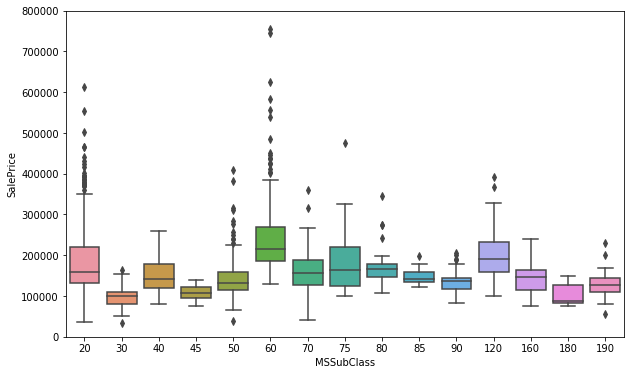

In [39]:
plt.figure(figsize=(10,6))
fig = sns.boxplot(x=data['MSSubClass'], y=data['SalePrice'])
fig.axis(ymin=0, ymax=800000)

For different types of dwelling, sale prices are different. 2-STORY 1946 & NEWER type has the highest median of sale price and 1-STORY 1945 & OLDER type has the lowest median of sale price. MSSubClass should be put in our model.

### MSZoning

(-0.5, 4.5, 0, 800000)

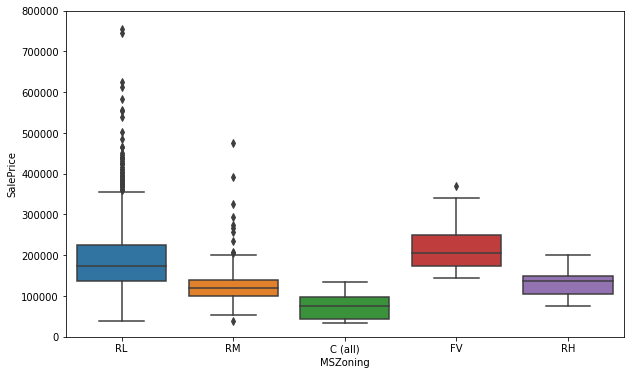

In [41]:
plt.figure(figsize=(10,6))
fig = sns.boxplot(x=data['MSZoning'], y=data['SalePrice'])
fig.axis(ymin=0, ymax=800000)

For different general zoning classification of the sale, the paired boxplots are different. So it should also be taken into consideration.

### LotFrontage

Text(0,0.5,'SalePrice')

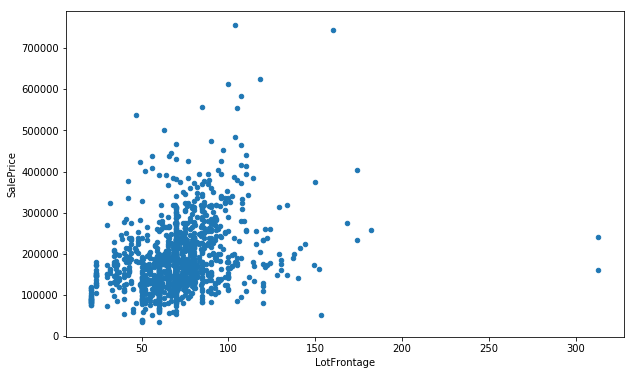

In [40]:
plt.figure(figsize=(10,6))
ax = plt.subplot()
ax.scatter(data['LotFrontage'],data['SalePrice'],s=20)
ax.set_xlabel('LotFrontage')
ax.set_ylabel('SalePrice')

As the linear feet of street connected to property goes up, the saleprice increases. There is a positive correlation relation between LotFrontage and SalePrice.

### LotArea

Text(0,0.5,'SalePrice')

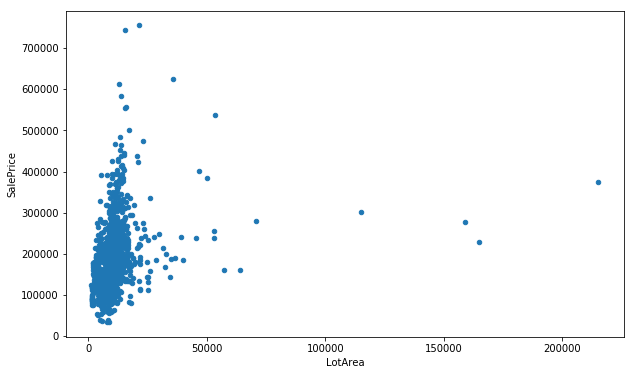

In [41]:
plt.figure(figsize=(10,6))
ax = plt.subplot()
ax.scatter(data['LotArea'],data['SalePrice'],s=20)
ax.set_xlabel('LotArea')
ax.set_ylabel('SalePrice')

We can see in the picture, there does not seem to have a obvious relationship between LotArea and SalePrice. 

### Neighborhood

[Text(0,0,'CollgCr'),
 Text(0,0,'Veenker'),
 Text(0,0,'Crawfor'),
 Text(0,0,'NoRidge'),
 Text(0,0,'Mitchel'),
 Text(0,0,'Somerst'),
 Text(0,0,'NWAmes'),
 Text(0,0,'OldTown'),
 Text(0,0,'BrkSide'),
 Text(0,0,'Sawyer'),
 Text(0,0,'NridgHt'),
 Text(0,0,'NAmes'),
 Text(0,0,'SawyerW'),
 Text(0,0,'IDOTRR'),
 Text(0,0,'MeadowV'),
 Text(0,0,'Edwards'),
 Text(0,0,'Timber'),
 Text(0,0,'Gilbert'),
 Text(0,0,'StoneBr'),
 Text(0,0,'ClearCr'),
 Text(0,0,'NPkVill'),
 Text(0,0,'Blmngtn'),
 Text(0,0,'BrDale'),
 Text(0,0,'SWISU'),
 Text(0,0,'Blueste')]

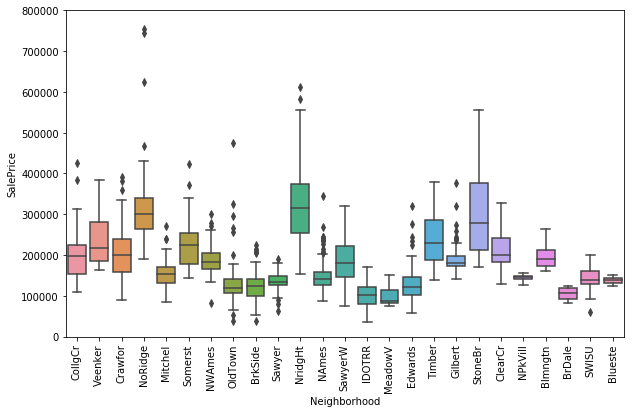

In [42]:
plt.figure(figsize=(10,6))
fig = sns.boxplot(x=data['Neighborhood'], y=data['SalePrice'])
fig.axis(ymin=0, ymax=800000)
fig.set_xticklabels(fig.get_xticklabels(), rotation = 90)

For different neighborhoods, saleprice varies. So neighborhood is a effect factor.

### OverallQual

(-0.5, 9.5, 0, 800000)

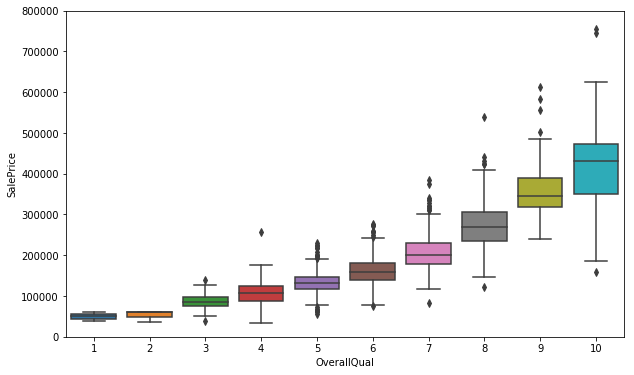

In [43]:
plt.figure(figsize=(10,6))
fig = sns.boxplot(x=data['OverallQual'], y=data['SalePrice'])
fig.axis(ymin=0, ymax=800000)

As the overall materia quality becomes better, the median of saleprice is increaing. The plot shows a positive correlation relation.

### YearBuilt

Text(0,0.5,'SalePrice')

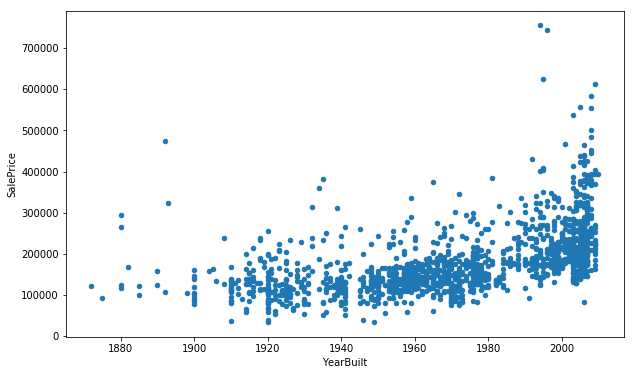

In [44]:
plt.figure(figsize=(10,6))
ax = plt.subplot()
ax.scatter(data['YearBuilt'],data['SalePrice'],s=20)
ax.set_xlabel('YearBuilt')
ax.set_ylabel('SalePrice')

The plot shows a linear increaing relation between YearBuilt and SalePrice. The latter the house was built, the higher its saleprice may be.

### MasVnrArea

Text(0,0.5,'SalePrice')

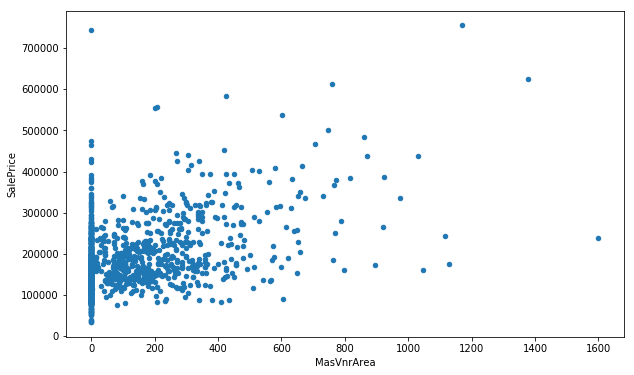

In [45]:
plt.figure(figsize=(10,6))
ax = plt.subplot()
ax.scatter(data['MasVnrArea'],data['SalePrice'],s=20)
ax.set_xlabel('MasVnrArea')
ax.set_ylabel('SalePrice')

The plot shows no obvious relation. We can ignnore the influence of MasVnrArea on SalePrice.

### TotalBsmtSF

Text(0,0.5,'SalePrice')

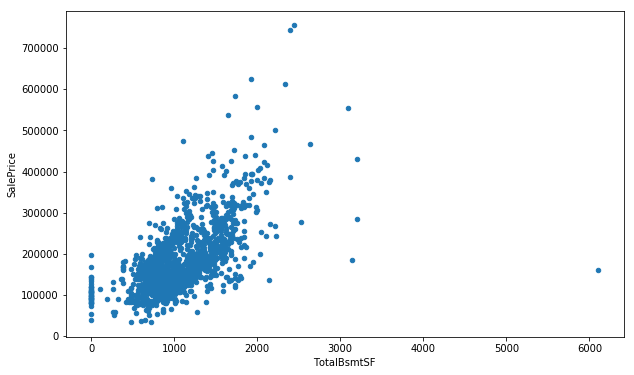

In [46]:
plt.figure(figsize=(10,6))
ax = plt.subplot()
ax.scatter(data['TotalBsmtSF'],data['SalePrice'],s=20)
ax.set_xlabel('TotalBsmtSF')
ax.set_ylabel('SalePrice')

The plot shows a linear increaing relation between TotalBsmtSF and SalePrice. The bigger the total square feet of basement area, the higher the saleprice.

### ExterQual

(-0.5, 3.5, 0, 800000)

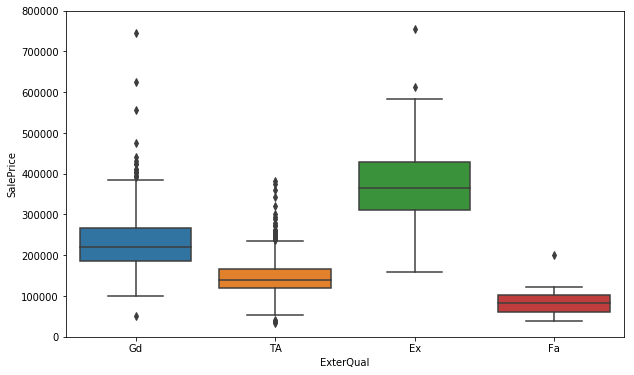

In [47]:
plt.figure(figsize=(10,6))
fig = sns.boxplot(x=data['ExterQual'], y=data['SalePrice'])
fig.axis(ymin=0, ymax=800000)

Saleprices are influenced by the quality of the material on the exterior since their boxplots are very different.

### CentralAir

(-0.5, 1.5, 0, 800000)

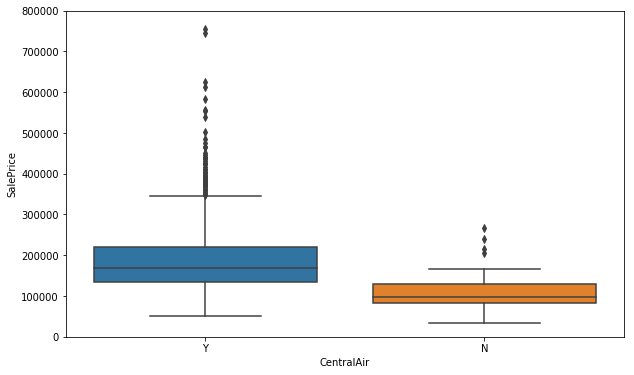

In [48]:
plt.figure(figsize=(10,6))
fig = sns.boxplot(x=data['CentralAir'], y=data['SalePrice'])
fig.axis(ymin=0, ymax=800000)

The boxplot shows that house with central air tends to have a higher sale price.

### GrLivArea

Text(0,0.5,'SalePrice')

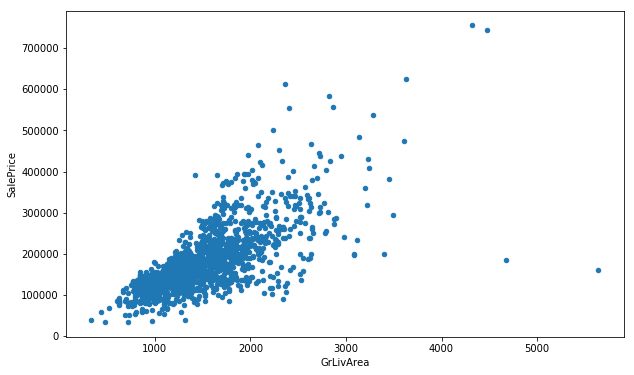

In [49]:
plt.figure(figsize=(10,6))
ax = plt.subplot()
ax.scatter(data['GrLivArea'],data['SalePrice'],s=20)
ax.set_xlabel('GrLivArea')
ax.set_ylabel('SalePrice')

The plot shows a linear increaing relation between GrLivArea and SalePrice. The bigger the Above grade (ground) living area square feet, the higher the saleprice.

### TotRmsAbvGrd

(-0.5, 11.5, 0, 800000)

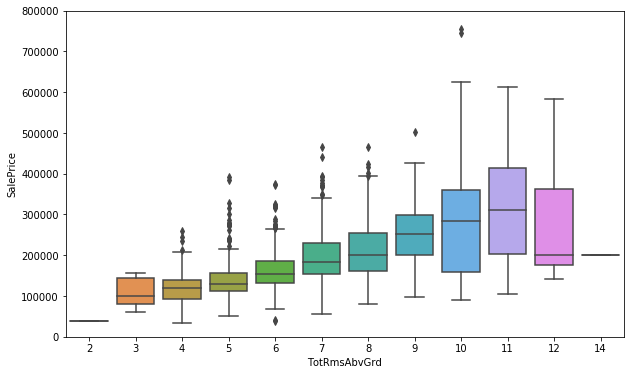

In [50]:
plt.figure(figsize=(10,6))
fig = sns.boxplot(x=data['TotRmsAbvGrd'], y=data['SalePrice'])
fig.axis(ymin=0, ymax=800000)

The more total rooms above grade, the higher the saleprices.

### Fireplaces

(-0.5, 3.5, 0, 800000)

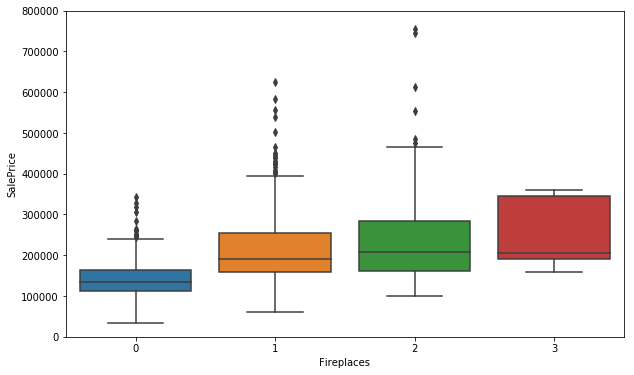

In [51]:
plt.figure(figsize=(10,6))
fig = sns.boxplot(x=data['Fireplaces'], y=data['SalePrice'])
fig.axis(ymin=0, ymax=800000)

The boxplot shows that house with more fireplaces tends to have higher sale price.

### KitchenQual

(-0.5, 3.5, 0, 800000)

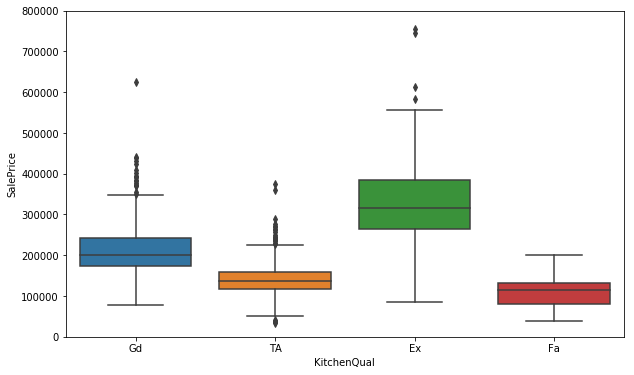

In [52]:
plt.figure(figsize=(10,6))
fig = sns.boxplot(x=data['KitchenQual'], y=data['SalePrice'])
fig.axis(ymin=0, ymax=800000)

Saleprices are influenced by the quality of the material on the kitchen since their boxplots are very different.

### GarageType

(-0.5, 6.5, 0, 800000)

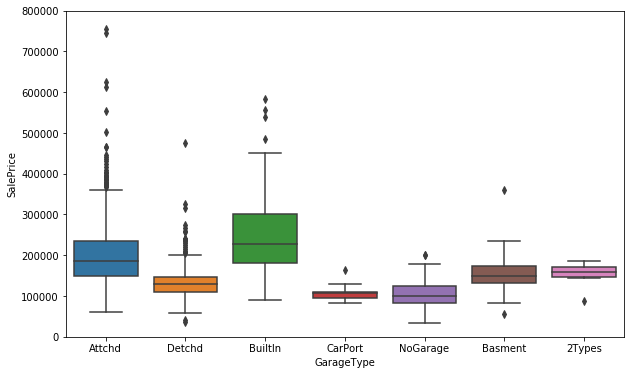

In [53]:
plt.figure(figsize=(10,6))
fig = sns.boxplot(x=data['GarageType'], y=data['SalePrice'])
fig.axis(ymin=0, ymax=800000)

Saleprices are influenced by the garage type since their boxplots are very different.

### GarageArea

Text(0,0.5,'SalePrice')

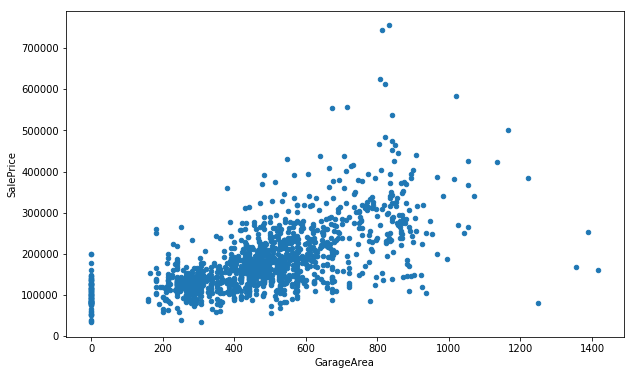

In [54]:
plt.figure(figsize=(10,6))
ax = plt.subplot()
ax.scatter(data['GarageArea'],data['SalePrice'],s=20)
ax.set_xlabel('GarageArea')
ax.set_ylabel('SalePrice')

The plot shows a linear increaing relation between GarageArea and SalePrice. The bigger the garage area square feet, the higher the saleprice.

### GarageFinsh

(-0.5, 3.5, 0, 800000)

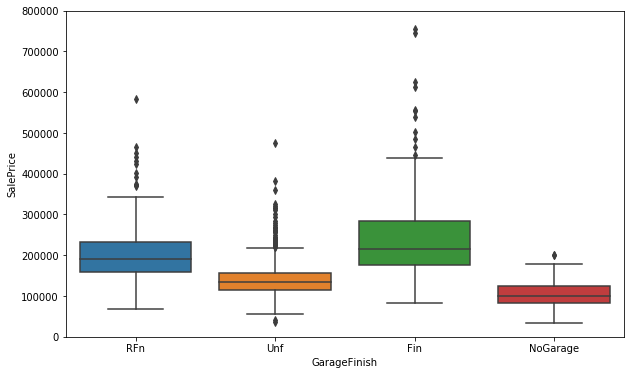

In [55]:
plt.figure(figsize=(10,6))
fig = sns.boxplot(x=data['GarageFinish'], y=data['SalePrice'])
fig.axis(ymin=0, ymax=800000)

The boxplot shows that Interior finish of the garage tend to have different sale price.

### GarageQual

(-0.5, 5.5, 0, 800000)

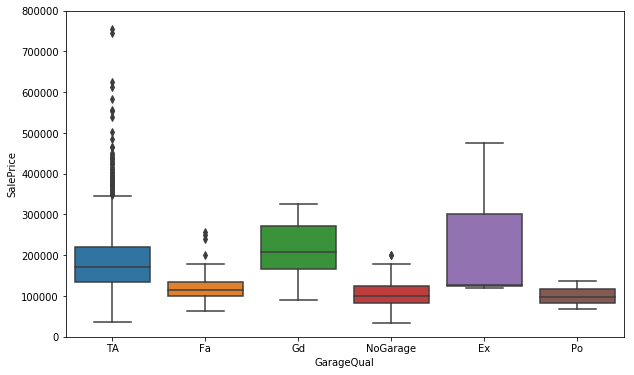

In [56]:
plt.figure(figsize=(10,6))
fig = sns.boxplot(x=data['GarageQual'], y=data['SalePrice'])
fig.axis(ymin=0, ymax=800000)

The boxplot shows that houses with different garage quality tend to have different sale price.

### PoolQC

(-0.5, 3.5, 0, 800000)

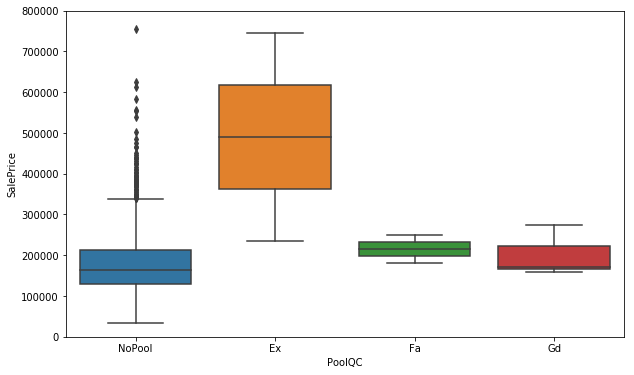

In [57]:
plt.figure(figsize=(10,6))
fig = sns.boxplot(x=data['PoolQC'], y=data['SalePrice'])
fig.axis(ymin=0, ymax=800000)

The boxplot shows that houses with different PoolQC tend to have different sale price.

### SaleType

(-0.5, 8.5, 0, 800000)

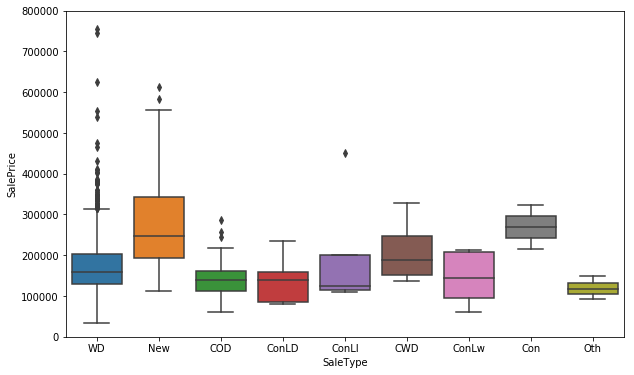

In [58]:
plt.figure(figsize=(10,6))
fig = sns.boxplot(x=data['SaleType'], y=data['SalePrice'])
fig.axis(ymin=0, ymax=800000)

The boxplot shows that houses with different sale types tend to have different sale price.

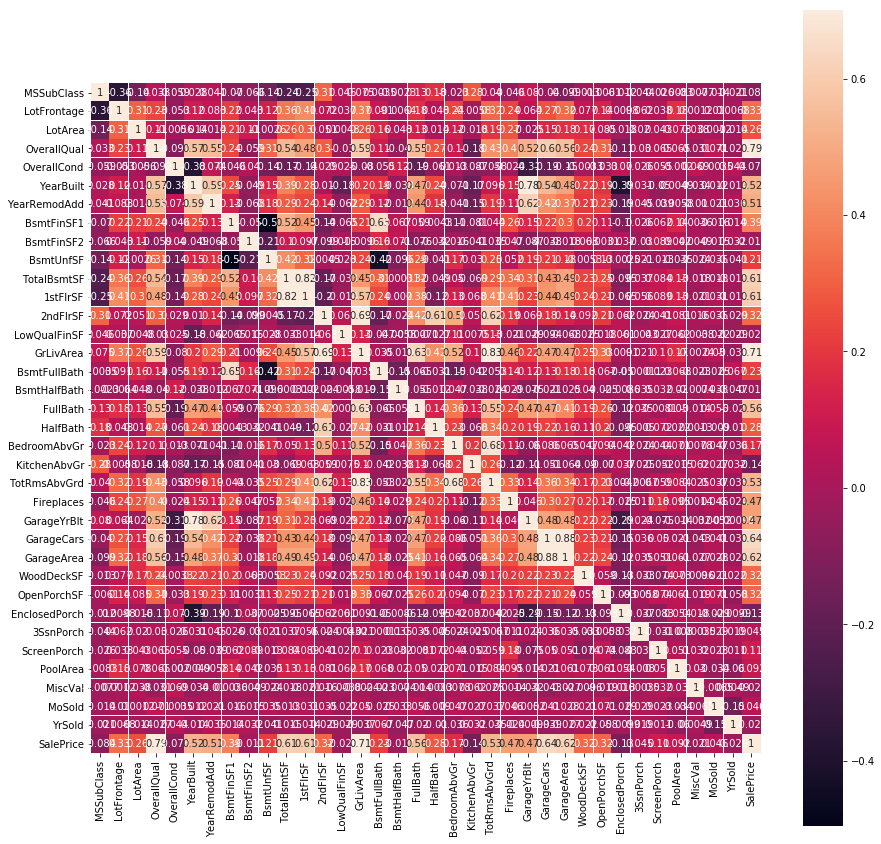

In [60]:
corr = data.iloc[:, 1:].corr()
plt.figure(figsize = (15, 15))

sns.heatmap(corr, vmax = 0.7, linewidths = 0.001, square = True, annot = True)

In [61]:
choosen_col = ["MSSubClass", "MSZoning", "Neighborhood", "OverallQual", "ExterQual", "CentralAir", "TotRmsAbvGrd",
               "Fireplaces", "KitchenQual", "GarageFinish", "GarageQual", "PoolQC", "SaleType", "LotFrontage", "YearBuilt",
               "TotalBsmtSF", "GrLivArea", "GarageArea"]

## Data cleaning

In [62]:
from sklearn.preprocessing import scale
from sklearn import metrics

In [63]:
Xdata = clean_data.iloc[:,1:(clean_data.shape[1]-1)]

In [64]:
types =[np.dtype(Xdata[Xdata.columns[i]]) for i in range(len(Xdata.columns))]

In [65]:
datatype = pd.DataFrame({"Variables":Xdata.columns,"Types":types})
datatype.head()

,Types,Variables
0,int64,MSSubClass
1,object,MSZoning
2,float64,LotFrontage
3,int64,LotArea
4,object,Street


In [66]:
#Divided the data into numeric data and categorical data
numeric = datatype[datatype['Types'] != object]
categorical = datatype[datatype['Types']== object]

In [67]:
numeric_data = pd.DataFrame() 
for i in range(numeric.shape[0]):
    numeric_data[numeric.iloc[i,1]] = clean_data[numeric.iloc[i,1]]

In [68]:
#Standalize the numeric data
numeric_scale = pd.DataFrame(scale(numeric_data))
numeric_scale.columns = list(numeric['Variables'])

In [69]:
fulldata = numeric_scale.copy()
for i in range(categorical.shape[0]):
    fulldata[categorical.iloc[i,1]] = clean_data[categorical.iloc[i,1]]

In [70]:
fulldata.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,SaleType,SaleCondition
0,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.575425,-0.288653,-0.944591,...,NoFireplace,Attchd,RFn,TA,TA,Y,NoPool,NoFence,WD,Normal
1,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,1.171992,-0.288653,-0.641228,...,TA,Attchd,RFn,TA,TA,Y,NoPool,NoFence,WD,Normal
2,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,0.092907,-0.288653,-0.301643,...,TA,Attchd,RFn,TA,TA,Y,NoPool,NoFence,WD,Normal
3,0.309859,-0.456474,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.499274,-0.288653,-0.061670,...,Gd,Detchd,Unf,TA,TA,Y,NoPool,NoFence,WD,Abnorml
4,0.073375,0.633618,0.375148,1.374795,-0.517200,0.951632,0.733308,0.463568,-0.288653,-0.174865,...,TA,Attchd,RFn,TA,TA,Y,NoPool,NoFence,WD,Normal


In [71]:
#Change the categorical data into dummy data
dummies = pd.get_dummies(fulldata,columns=list(categorical['Variables']),prefix=list(categorical['Variables']),prefix_sep="_",dummy_na=False,drop_first=False)
dummies.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.575425,-0.288653,-0.944591,...,0,0,0,1,0,0,0,0,1,0
1,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,1.171992,-0.288653,-0.641228,...,0,0,0,1,0,0,0,0,1,0
2,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,0.092907,-0.288653,-0.301643,...,0,0,0,1,0,0,0,0,1,0
3,0.309859,-0.456474,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.499274,-0.288653,-0.061670,...,0,0,0,1,1,0,0,0,0,0
4,0.073375,0.633618,0.375148,1.374795,-0.517200,0.951632,0.733308,0.463568,-0.288653,-0.174865,...,0,0,0,1,0,0,0,0,1,0


In [72]:
#Select the data of the variables choosen previously
partdata = pd.DataFrame()
for i in range(len(choosen_col)):
    partdata[choosen_col[i]] = fulldata[choosen_col[i]]

In [73]:
partdata.head()

,MSSubClass,MSZoning,Neighborhood,OverallQual,ExterQual,CentralAir,TotRmsAbvGrd,Fireplaces,KitchenQual,GarageFinish,GarageQual,PoolQC,SaleType,LotFrontage,YearBuilt,TotalBsmtSF,GrLivArea,GarageArea
0,0.073375,RL,CollgCr,0.651479,Gd,Y,0.912210,-0.951226,Gd,RFn,TA,NoPool,WD,-0.229372,1.050994,-0.459303,0.370333,0.351000
1,-0.872563,RL,Veenker,-0.071836,TA,Y,-0.318683,0.600495,TA,RFn,TA,NoPool,WD,0.451936,0.156734,0.466465,-0.482512,-0.060731
2,0.073375,RL,CollgCr,0.651479,Gd,Y,-0.318683,0.600495,Gd,RFn,TA,NoPool,WD,-0.093110,0.984752,-0.313369,0.515013,0.631726
3,0.309859,RL,Crawfor,0.651479,TA,Y,0.296763,0.600495,Gd,Unf,TA,NoPool,WD,-0.456474,-1.863632,-0.687324,0.383659,0.790804
4,0.073375,RL,NoRidge,1.374795,Gd,Y,1.527656,0.600495,Gd,RFn,TA,NoPool,WD,0.633618,0.951632,0.199680,1.299326,1.698485


In [74]:
dummies1 = pd.get_dummies(partdata,prefix_sep="_",dummy_na=False,drop_first=False)
dummies1.head()

,MSSubClass,OverallQual,TotRmsAbvGrd,Fireplaces,LotFrontage,YearBuilt,TotalBsmtSF,GrLivArea,GarageArea,MSZoning_C (all),...,PoolQC_NoPool,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,0.073375,0.651479,0.912210,-0.951226,-0.229372,1.050994,-0.459303,0.370333,0.351000,0,...,1,0,0,0,0,0,0,0,0,1
1,-0.872563,-0.071836,-0.318683,0.600495,0.451936,0.156734,0.466465,-0.482512,-0.060731,0,...,1,0,0,0,0,0,0,0,0,1
2,0.073375,0.651479,-0.318683,0.600495,-0.093110,0.984752,-0.313369,0.515013,0.631726,0,...,1,0,0,0,0,0,0,0,0,1
3,0.309859,0.651479,0.296763,0.600495,-0.456474,-1.863632,-0.687324,0.383659,0.790804,0,...,1,0,0,0,0,0,0,0,0,1
4,0.073375,1.374795,1.527656,0.600495,0.633618,0.951632,0.199680,1.299326,1.698485,0,...,1,0,0,0,0,0,0,0,0,1


In [75]:
fullX = np.array(dummies)
fullX = np.float64(fullX)
partX = np.array(dummies1)
partX = np.float64(partX)
y = clean_data['SalePrice']
y = np.array(y)

In [76]:
fullX.shape

(1460, 625)

In [78]:
partX.shape

(1460, 72)

In [77]:
#For windows system, please run this function
def kcv_risk(X,y,regmod):
    """
    Construct the 10-fold cross-validatioin square error risk for a regression model
    
    Input: design matrix, X, response vector, y, a regression model, regmod
    Output: scalar KSV risk
    """
    i = 0
    kf = KFold(n=len(y),n_folds=10, shuffle = True)
    kcv_losses = []
    for train_index, test_index in kf:
        i = i+1
        X_train, X_test = X[train_index,:], X[test_index,:]
        y_train, y_test = y[train_index], y[test_index]
        regmod.fit(X_train,y_train)
        y_hat = regmod.predict(X_test)
        loss = metrics.mean_squared_error(y_test, y_hat)
        print('Fold '+ str(i)+' MSE : '+ str(loss))
        kcv_losses.append(loss)
    return [kcv_losses,np.mean(kcv_losses)]

In [79]:
#For mac system, please run this function
def kcv_risk(X,y,regmod):
    """
    Construct the 10-fold cross-validatioin square error risk for a regression model
    
    Input: design matrix, X, response vector, y, a regression model, regmod
    Output: scalar KSV risk
    """
    i = 0
    kf = KFold(n_splits=10, shuffle = True)
    kcv_losses = []
    for train_index, test_index in kf.split(X):
        i = i+1
        X_train, X_test = X.loc[train_index,:], X.loc[test_index,:]
        y_train, y_test = y.loc[train_index], y.loc[test_index]
        regmod.fit(X_train,y_train)
        y_hat = regmod.predict(X_test)
        loss = metrics.mean_squared_error(y_test, y_hat)
        print('Fold '+ str(i)+' MSE : '+ str(loss))
        kcv_losses.append(loss)
    return [kcv_losses,np.mean(kcv_losses)]

## Fit data in Models

In [79]:
from sklearn import linear_model, neighbors
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV,lars_path, Lasso, LassoCV
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### OLS Model

In [80]:
lin1 = linear_model.LinearRegression(fit_intercept=False)
mse_ols = kcv_risk(partX,y,lin1)
print('KCV Risk (OLS model): '+ str(mse_ols[1]))

Fold 1 MSE : 1008822068.32
Fold 2 MSE : 1147849952.16
Fold 3 MSE : 4633927883.51
Fold 4 MSE : 2988029299.79
Fold 5 MSE : 670736776.856
Fold 6 MSE : 859333086.13
Fold 7 MSE : 3410854058.88
Fold 8 MSE : 1089673085.92
Fold 9 MSE : 647451301.933
Fold 10 MSE : 1625152721.06
KCV Risk (OLS model): 1808183023.46


### Ridge Regression Model

In [81]:
kcv = []
lambdas = 10**np.linspace(10,-2,100)*0.5
ridge = Ridge()
for a in range(len(lambdas)):
    ridge.set_params(alpha=lambdas[a])
    print('lambda = '+str(lambdas[a]))
    kcv.append(kcv_risk(fullX,y,ridge)[1])

lambda = 5000000000.0
Fold 1 MSE : 5633540515.45
Fold 2 MSE : 4732474502.71
Fold 3 MSE : 5730877013.59
Fold 4 MSE : 7661928133.04
Fold 5 MSE : 7553942560.08
Fold 6 MSE : 7981093651.22
Fold 7 MSE : 7174439440.03
Fold 8 MSE : 5342886021.73
Fold 9 MSE : 4382562618.68
Fold 10 MSE : 6930801581.0
lambda = 3782316637.77
Fold 1 MSE : 7056601217.82
Fold 2 MSE : 7575043887.76
Fold 3 MSE : 7996538680.27
Fold 4 MSE : 4818120201.84
Fold 5 MSE : 5485350499.96
Fold 6 MSE : 5095794153.75
Fold 7 MSE : 5884655514.56
Fold 8 MSE : 4856923375.79
Fold 9 MSE : 6514441133.08
Fold 10 MSE : 7880969926.55
lambda = 2861183829.68
Fold 1 MSE : 8357148081.39
Fold 2 MSE : 6519601302.57
Fold 3 MSE : 5350120394.54
Fold 4 MSE : 7128583347.06
Fold 5 MSE : 6940449100.5
Fold 6 MSE : 4958946752.34
Fold 7 MSE : 6836409106.47
Fold 8 MSE : 6519657185.13
Fold 9 MSE : 4239958349.7
Fold 10 MSE : 6249858604.35
lambda = 2164380640.54
Fold 1 MSE : 3921403779.98
Fold 2 MSE : 5999074236.19
Fold 3 MSE : 6241275700.97
Fold 4 MSE : 89040

Fold 6 MSE : 6911266925.34
Fold 7 MSE : 6691971313.29
Fold 8 MSE : 6973797258.27
Fold 9 MSE : 5627945984.9
Fold 10 MSE : 5980030498.85
lambda = 1526927.75442
Fold 1 MSE : 8851701140.83
Fold 2 MSE : 6484297979.37
Fold 3 MSE : 8324470801.64
Fold 4 MSE : 6435385101.7
Fold 5 MSE : 5992226088.82
Fold 6 MSE : 4575079456.58
Fold 7 MSE : 4803981911.83
Fold 8 MSE : 6090062015.61
Fold 9 MSE : 6198447741.06
Fold 10 MSE : 4724505090.86
lambda = 1155064.85004
Fold 1 MSE : 4240225115.66
Fold 2 MSE : 11313097158.0
Fold 3 MSE : 6879438766.17
Fold 4 MSE : 7087444282.61
Fold 5 MSE : 7484915455.64
Fold 6 MSE : 6161056603.17
Fold 7 MSE : 4046501924.24
Fold 8 MSE : 3898067206.54
Fold 9 MSE : 4694732883.91
Fold 10 MSE : 6518057537.1
lambda = 873764.200004
Fold 1 MSE : 4690424928.66
Fold 2 MSE : 11495924218.7
Fold 3 MSE : 5278710670.71
Fold 4 MSE : 6467558444.78
Fold 5 MSE : 4814783459.96
Fold 6 MSE : 4347601094.5
Fold 7 MSE : 9888391372.16
Fold 8 MSE : 5980057079.59
Fold 9 MSE : 4069890939.95
Fold 10 MSE : 

Fold 7 MSE : 709687473.249
Fold 8 MSE : 746765698.179
Fold 9 MSE : 1244287947.23
Fold 10 MSE : 581031209.653
lambda = 616.423369721
Fold 1 MSE : 487933342.366
Fold 2 MSE : 703277252.737
Fold 3 MSE : 567479953.752
Fold 4 MSE : 741577010.245
Fold 5 MSE : 745874712.369
Fold 6 MSE : 1602246799.35
Fold 7 MSE : 1739958424.09
Fold 8 MSE : 1443495681.91
Fold 9 MSE : 3146255545.27
Fold 10 MSE : 1731037227.86
lambda = 466.301673442
Fold 1 MSE : 1013339706.26
Fold 2 MSE : 735931532.834
Fold 3 MSE : 2957540291.17
Fold 4 MSE : 1011656039.3
Fold 5 MSE : 691030597.477
Fold 6 MSE : 785386079.535
Fold 7 MSE : 510429335.297
Fold 8 MSE : 818763253.951
Fold 9 MSE : 3270668094.25
Fold 10 MSE : 632855774.256
lambda = 352.740115536
Fold 1 MSE : 538240350.616
Fold 2 MSE : 1466554323.9
Fold 3 MSE : 564286779.204
Fold 4 MSE : 3243147081.58
Fold 5 MSE : 1071400141.12
Fold 6 MSE : 884733001.968
Fold 7 MSE : 876132464.197
Fold 8 MSE : 809165230.825
Fold 9 MSE : 1812617289.27
Fold 10 MSE : 822064552.21
lambda = 266

Fold 8 MSE : 945742572.541
Fold 9 MSE : 1102975033.13
Fold 10 MSE : 1247743015.7
lambda = 0.248851178217
Fold 1 MSE : 383707340.279
Fold 2 MSE : 1976693012.81
Fold 3 MSE : 3533638098.51
Fold 4 MSE : 752930183.609
Fold 5 MSE : 505539249.676
Fold 6 MSE : 1710478984.0
Fold 7 MSE : 1054176368.32
Fold 8 MSE : 689506959.967
Fold 9 MSE : 744181639.097
Fold 10 MSE : 814662545.874
lambda = 0.18824679034
Fold 1 MSE : 1294709267.16
Fold 2 MSE : 1137060496.15
Fold 3 MSE : 4123362932.31
Fold 4 MSE : 1080343842.22
Fold 5 MSE : 895074059.647
Fold 6 MSE : 487547924.508
Fold 7 MSE : 612033828.809
Fold 8 MSE : 575084045.512
Fold 9 MSE : 1701092950.55
Fold 10 MSE : 905409481.172
lambda = 0.142401793422
Fold 1 MSE : 615187605.895
Fold 2 MSE : 3540339207.08
Fold 3 MSE : 1350513915.09
Fold 4 MSE : 915466266.62
Fold 5 MSE : 651284957.76
Fold 6 MSE : 985375977.291
Fold 7 MSE : 644331871.228
Fold 8 MSE : 759161830.207
Fold 9 MSE : 1606213949.34
Fold 10 MSE : 886601370.107
lambda = 0.107721734502
Fold 1 MSE : 7

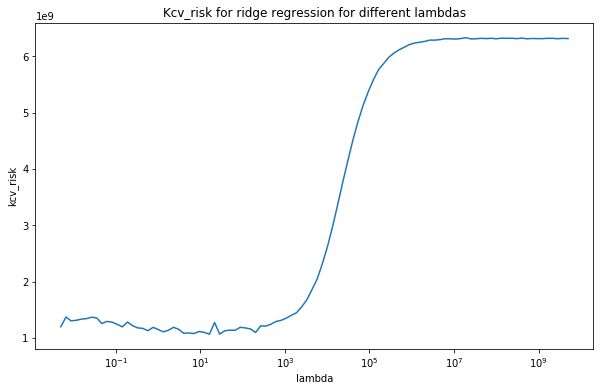

In [82]:
plt.figure(figsize=(10,6))
ax = plt.gca()
ax.plot(lambdas, kcv)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('lambda')
plt.ylabel('kcv_risk')
plt.title('Kcv_risk for ridge regression for different lambdas');

From the plot, we can see that the average mse increases as the value of lambda increase for ridge regression model.

In [83]:
model_ridge = RidgeCV(alphas = list(lambdas)) #Select the best lambdas using cross-validation
mse_ridge = kcv_risk(partX,y,model_ridge)
print('KCV Risk (Ridge regression model): '+ str(mse_ridge[1]))

Fold 1 MSE : 1166936868.57
Fold 2 MSE : 1686961439.45
Fold 3 MSE : 1021802906.04
Fold 4 MSE : 3060824001.7
Fold 5 MSE : 1465147654.02
Fold 6 MSE : 938482053.128
Fold 7 MSE : 406077351.346
Fold 8 MSE : 589223749.619
Fold 9 MSE : 702465088.353
Fold 10 MSE : 897195810.29
KCV Risk (Ridge regression model): 1193511692.25


In [87]:
# The best lambda
model_ridge.alpha_

12.385381779958569

### Lasso Model

In [84]:
larper = lars_path(fullX,y,method="lasso")

Text(0,0.5,'Coef')

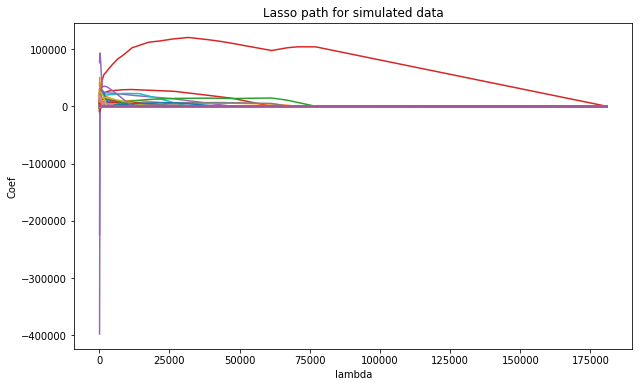

In [85]:
plt.figure(figsize=(10,6))
for j in set(range(fullX.shape[1])):
    plt.plot(larper[0],larper[2][j,:])
plt.title('Lasso path for simulated data')
plt.xlabel('lambda')
plt.ylabel('Coef')

From the plot we can see that the parameters converge as the increase of the value of lambda.

In [88]:
kcv1 = []
lambdas1 = list(larper[0])
lasso = Lasso()
for a in range(len(lambdas1)):
    lasso.set_params(alpha=lambdas1[a])
    print('lambda = '+str(lambdas1[a]))
    kcv1.append(kcv_risk(fullX,y,lasso)[1])

lambda = 180827.017808
Fold 1 MSE : 5199141079.04
Fold 2 MSE : 6945562967.41
Fold 3 MSE : 7405108801.17
Fold 4 MSE : 7530632516.32
Fold 5 MSE : 5153001229.38
Fold 6 MSE : 5936420697.98
Fold 7 MSE : 4422289344.45
Fold 8 MSE : 6436344553.15
Fold 9 MSE : 7034871665.85
Fold 10 MSE : 7078552137.85
lambda = 77081.4198774
Fold 1 MSE : 8457380272.09
Fold 2 MSE : 4601546147.27
Fold 3 MSE : 5337391314.46
Fold 4 MSE : 5171557006.22
Fold 5 MSE : 5673183678.18
Fold 6 MSE : 6861726849.3
Fold 7 MSE : 7677296783.84
Fold 8 MSE : 7269306309.59
Fold 9 MSE : 6715440073.75
Fold 10 MSE : 5390185898.59
lambda = 70683.7556324
Fold 1 MSE : 6388734354.59
Fold 2 MSE : 5111209263.78
Fold 3 MSE : 5828235174.44
Fold 4 MSE : 6750761196.12
Fold 5 MSE : 5579866340.82
Fold 6 MSE : 5151220268.82
Fold 7 MSE : 10511469333.2
Fold 8 MSE : 3737924467.52
Fold 9 MSE : 7014896463.98
Fold 10 MSE : 7034737708.78
lambda = 67047.6138001
Fold 1 MSE : 4259635930.93
Fold 2 MSE : 7182026917.36
Fold 3 MSE : 4798377192.17
Fold 4 MSE : 48

Fold 2 MSE : 1918097652.45
Fold 3 MSE : 1392906021.41
Fold 4 MSE : 1740123976.13
Fold 5 MSE : 3424843953.86
Fold 6 MSE : 956154420.259
Fold 7 MSE : 636837390.956
Fold 8 MSE : 1031093203.26
Fold 9 MSE : 1329627405.72
Fold 10 MSE : 1408343011.32
lambda = 4573.02951146
Fold 1 MSE : 710096341.52
Fold 2 MSE : 1064787722.5
Fold 3 MSE : 3490607166.33
Fold 4 MSE : 1550159346.66
Fold 5 MSE : 1230176283.55
Fold 6 MSE : 707641680.62
Fold 7 MSE : 2052215660.35
Fold 8 MSE : 1536199419.45
Fold 9 MSE : 1507334509.73
Fold 10 MSE : 834638228.633
lambda = 4014.44314619
Fold 1 MSE : 2310727004.52
Fold 2 MSE : 1533253796.06
Fold 3 MSE : 1213641367.98
Fold 4 MSE : 3349587399.35
Fold 5 MSE : 2079832536.46
Fold 6 MSE : 732425646.367
Fold 7 MSE : 584433078.347
Fold 8 MSE : 1000115950.27
Fold 9 MSE : 1113809606.84
Fold 10 MSE : 1026128231.73
lambda = 3559.63066437
Fold 1 MSE : 1853740247.94
Fold 2 MSE : 710077377.193
Fold 3 MSE : 1007253710.28
Fold 4 MSE : 1472734633.33
Fold 5 MSE : 4763696336.96
Fold 6 MSE : 

Fold 5 MSE : 756854176.967
Fold 6 MSE : 693146476.619
Fold 7 MSE : 760718301.778
Fold 8 MSE : 3752086267.03
Fold 9 MSE : 922119412.592
Fold 10 MSE : 1438103750.21
lambda = 960.752125556
Fold 1 MSE : 735949167.495
Fold 2 MSE : 726938399.664
Fold 3 MSE : 610034551.295
Fold 4 MSE : 568483041.651
Fold 5 MSE : 3480764697.62
Fold 6 MSE : 1048956865.54
Fold 7 MSE : 471958551.893
Fold 8 MSE : 2000036030.83
Fold 9 MSE : 1514931827.59
Fold 10 MSE : 530796575.796
lambda = 874.483497223
Fold 1 MSE : 1024436778.35
Fold 2 MSE : 1778817872.26
Fold 3 MSE : 3751675885.88
Fold 4 MSE : 1193333792.63
Fold 5 MSE : 692678547.273
Fold 6 MSE : 986858833.524
Fold 7 MSE : 645420850.767
Fold 8 MSE : 783880208.653
Fold 9 MSE : 672892302.918
Fold 10 MSE : 1087029032.8
lambda = 843.654938855
Fold 1 MSE : 1124401352.16
Fold 2 MSE : 452679388.658
Fold 3 MSE : 1866212199.29
Fold 4 MSE : 580787559.314
Fold 5 MSE : 3233254843.91
Fold 6 MSE : 1081984851.89
Fold 7 MSE : 797802240.323
Fold 8 MSE : 754401694.337
Fold 9 MSE 

Fold 6 MSE : 327234572.539
Fold 7 MSE : 1003125339.68
Fold 8 MSE : 735839189.522
Fold 9 MSE : 592602573.117
Fold 10 MSE : 627115581.609
lambda = 357.320027554
Fold 1 MSE : 730828784.612
Fold 2 MSE : 2351291695.2
Fold 3 MSE : 400338142.502
Fold 4 MSE : 3277174211.36
Fold 5 MSE : 973540085.766
Fold 6 MSE : 509499671.337
Fold 7 MSE : 682106911.521
Fold 8 MSE : 517110345.011
Fold 9 MSE : 980953340.501
Fold 10 MSE : 873635880.653
lambda = 354.869001606
Fold 1 MSE : 960612739.839
Fold 2 MSE : 628629984.07
Fold 3 MSE : 1511935204.81
Fold 4 MSE : 3173549280.78
Fold 5 MSE : 486691867.211
Fold 6 MSE : 1375530776.88
Fold 7 MSE : 359333424.773
Fold 8 MSE : 913363348.325
Fold 9 MSE : 1016180970.46
Fold 10 MSE : 761860593.591
lambda = 354.263882472
Fold 1 MSE : 499313659.82
Fold 2 MSE : 491000102.67
Fold 3 MSE : 837503731.698
Fold 4 MSE : 719147872.45
Fold 5 MSE : 399122538.271
Fold 6 MSE : 3249742214.4
Fold 7 MSE : 2710626261.9
Fold 8 MSE : 768525444.147
Fold 9 MSE : 682784824.955
Fold 10 MSE : 612

Fold 6 MSE : 679110257.78
Fold 7 MSE : 1522011436.19
Fold 8 MSE : 856136752.378
Fold 9 MSE : 1046564111.09
Fold 10 MSE : 431373042.323
lambda = 201.413374889
Fold 1 MSE : 563729568.773
Fold 2 MSE : 677272386.424
Fold 3 MSE : 1324526702.42
Fold 4 MSE : 564455944.479
Fold 5 MSE : 1173155481.77
Fold 6 MSE : 772846484.231
Fold 7 MSE : 3078418268.12
Fold 8 MSE : 578579428.711
Fold 9 MSE : 614925859.489
Fold 10 MSE : 489449227.293
lambda = 200.871895982
Fold 1 MSE : 439455549.825
Fold 2 MSE : 1241185999.83
Fold 3 MSE : 612155223.177
Fold 4 MSE : 263015985.29
Fold 5 MSE : 529666022.236
Fold 6 MSE : 483129912.576
Fold 7 MSE : 1541779952.09
Fold 8 MSE : 1515838339.69
Fold 9 MSE : 574916222.064
Fold 10 MSE : 3479535028.8
lambda = 196.300223625
Fold 1 MSE : 1386431830.53
Fold 2 MSE : 3377611720.35
Fold 3 MSE : 1423928472.19
Fold 4 MSE : 441524707.371
Fold 5 MSE : 526810757.599
Fold 6 MSE : 391339110.799
Fold 7 MSE : 619847835.962
Fold 8 MSE : 1243386685.4
Fold 9 MSE : 641312725.549
Fold 10 MSE : 

Fold 6 MSE : 1255381882.51
Fold 7 MSE : 1520715949.36
Fold 8 MSE : 481178220.433
Fold 9 MSE : 601095952.775
Fold 10 MSE : 756207082.163
lambda = 128.979625105
Fold 1 MSE : 1027169845.25
Fold 2 MSE : 577481703.768
Fold 3 MSE : 1450420656.48
Fold 4 MSE : 931313416.77
Fold 5 MSE : 323748360.6
Fold 6 MSE : 502687985.636
Fold 7 MSE : 509360064.696
Fold 8 MSE : 3508664978.57
Fold 9 MSE : 320644172.095
Fold 10 MSE : 1233490873.12
lambda = 128.032627748
Fold 1 MSE : 540123222.445
Fold 2 MSE : 547089641.622
Fold 3 MSE : 3574591624.96
Fold 4 MSE : 1473993003.64
Fold 5 MSE : 823510487.086
Fold 6 MSE : 573070812.903
Fold 7 MSE : 844616253.232
Fold 8 MSE : 850425315.361
Fold 9 MSE : 293419384.507
Fold 10 MSE : 438872087.854
lambda = 127.19106472
Fold 1 MSE : 628196347.309
Fold 2 MSE : 345571295.875
Fold 3 MSE : 393159878.483
Fold 4 MSE : 1803158510.25
Fold 5 MSE : 611307567.531
Fold 6 MSE : 3788920194.63
Fold 7 MSE : 961169528.303
Fold 8 MSE : 714799223.743
Fold 9 MSE : 974276450.169
Fold 10 MSE : 

Fold 6 MSE : 1580973726.21
Fold 7 MSE : 1135387933.76
Fold 8 MSE : 400376285.267
Fold 9 MSE : 572224308.178
Fold 10 MSE : 627226874.979
lambda = 88.5942981548
Fold 1 MSE : 475709332.778
Fold 2 MSE : 551155771.907
Fold 3 MSE : 627095645.306
Fold 4 MSE : 792838984.569
Fold 5 MSE : 3649945681.55
Fold 6 MSE : 526862394.463
Fold 7 MSE : 1708663156.5
Fold 8 MSE : 1255895197.85
Fold 9 MSE : 564734174.511
Fold 10 MSE : 481769355.728


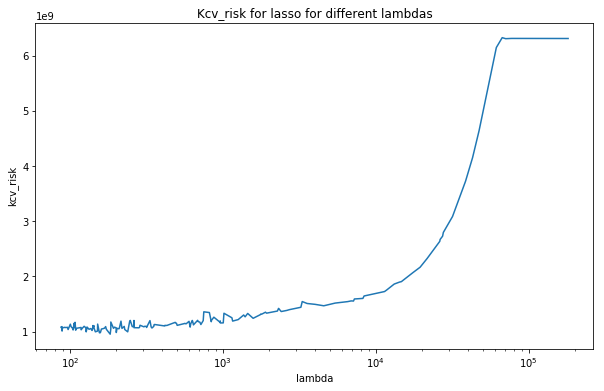

In [89]:
plt.figure(figsize=(10,6))
ax = plt.gca()
ax.plot(lambdas1, kcv1)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('lambda')
plt.ylabel('kcv_risk')
plt.title('Kcv_risk for lasso for different lambdas');

From the plot, we can see that the average mse increases as the value of lambda increase for lasso model.

In [90]:
model_lasso = LassoCV(alphas = list(larper[0])) #Select the best lambdas using cross-validation
mse_lasso = kcv_risk(fullX,y,model_lasso)
print('KCV Risk (Lasso model): '+ str(mse_lasso[1]))

Fold 1 MSE : 338332018.266
Fold 2 MSE : 399335101.25
Fold 3 MSE : 459194858.674
Fold 4 MSE : 779510671.099
Fold 5 MSE : 414151378.171
Fold 6 MSE : 508814076.348
Fold 7 MSE : 401119108.852
Fold 8 MSE : 1696748886.68
Fold 9 MSE : 927789267.93
Fold 10 MSE : 5392683203.33
KCV Risk (Lasso model): 1131767857.06


In [93]:
#The best lambda
model_lasso.alpha_

209.68152577635482

In [95]:
# The number of variables selected using the best lambda
coef = model_lasso.coef_
sum([x !=0 for x in coef])

75

### Random Forest Model

In [96]:
model_ranfor = RandomForestRegressor(n_estimators=300)
mse_ranfor = kcv_risk(fullX,y,model_ranfor)
print('KCV Risk (random forest model): '+ str(mse_ranfor[1]))

Fold 1 MSE : 708377024.086
Fold 2 MSE : 1000459407.92
Fold 3 MSE : 1471709652.9
Fold 4 MSE : 1456893746.78
Fold 5 MSE : 758624491.063
Fold 6 MSE : 996139796.118
Fold 7 MSE : 721485409.837
Fold 8 MSE : 579823282.386
Fold 9 MSE : 704702153.464
Fold 10 MSE : 399713799.371
KCV Risk (random forest model): 879792876.392


### XGboost Model

In [91]:
model_xgb = xgb.XGBRegressor(n_estimators = 5000, seed = 0, learning_rate = 0.01, max_depth = 3, subsample = 0.8, 
                       colsample_bytree = 0.8, colsample_bylevel = 0.8 )
mse_xgb = kcv_risk(fullX,y,model_xgb)
print('KCV Risk (XGboost model): '+ str(mse_xgb[1]))

Fold 1 MSE : 572780942.581
Fold 2 MSE : 1762190821.89
Fold 3 MSE : 434187925.392
Fold 4 MSE : 705723144.199
Fold 5 MSE : 560056190.177
Fold 6 MSE : 362060733.283
Fold 7 MSE : 443021678.058
Fold 8 MSE : 729515851.069
Fold 9 MSE : 374646885.513
Fold 10 MSE : 295709214.485
KCV Risk (XGboost model): 623989338.665


## Compare Models

(array([  0.00000000e+00,   1.00000000e+09,   2.00000000e+09,
          3.00000000e+09,   4.00000000e+09,   5.00000000e+09,
          6.00000000e+09]), <a list of 7 Text yticklabel objects>)

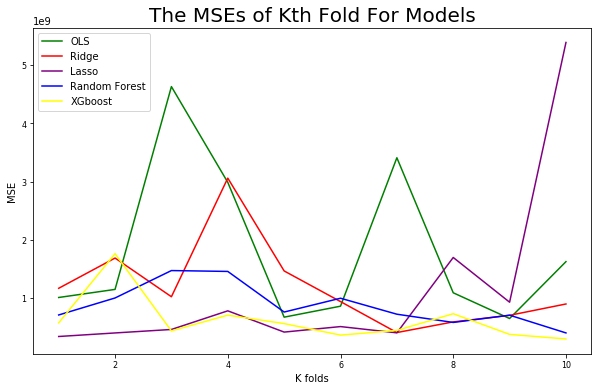

In [97]:
index = [1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize=(10,6))
plt.title('The MSEs of Kth Fold For Models',fontsize = 20)
plt.plot(index,mse_ols[0],color = 'green',label = 'OLS')
plt.plot(index,mse_ridge[0],color = 'red',label = 'Ridge')
plt.plot(index,mse_lasso[0],color = 'purple',label = 'Lasso')
plt.plot(index,mse_ranfor[0],color = 'blue',label = 'Random Forest')
plt.plot(index,mse_xgb[0],color = 'yellow',label = 'XGboost')
plt.legend()
ax.legend(fontsize = 8)
plt.xlabel('K folds',fontsize = 10)
plt.ylabel('MSE',fontsize = 10)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)

In [98]:
MSE_avg = pd.DataFrame({'Model':['OLS','Ridge Regression','Lasso','Random Forest','XGboost'],
                        'MSE_avg':[mse_ols[1],mse_ridge[1],mse_lasso[1],mse_ranfor[1],mse_xgb[1]]})
MSE_avg

,MSE_avg,Model
0,1.808183e+09,OLS
1,1.193512e+09,Ridge Regression
2,1.131768e+09,Lasso
3,8.797929e+08,Random Forest
4,6.239893e+08,XGboost


From the plot above, we can see that the XGboost model has smaller mses for every pair of train and test data in the 10-fold cross-validation.
And from the dataframe above, we can see that the XGboost model has least average mse in the five model.
Therefore, the XGboost model is the best in the five models to fit the data.